## Bar Charts

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
data1 = np.arange(1,11)
data2 = data1 ** 2

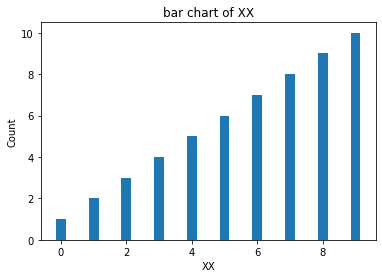

In [3]:
plt.figure()
xvals = range(len(data1))
plt.bar(xvals, data1, width = 0.3)

# Add title and axis names
plt.title('bar chart of XX')
plt.xlabel('XX')
plt.ylabel('Count');

<BarContainer object of 10 artists>

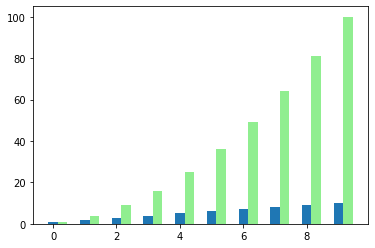

In [4]:
plt.figure()
xvals = range(len(data1))
plt.bar(xvals, data1, width = 0.3)

new_xvals = []

# plot another set of bars
# adjusting the new xvals to make up for the first set of bars 
for item in xvals:
    new_xvals.append(item+0.3)

plt.bar(new_xvals, data2, width = 0.3 ,color='lightgreen')



<BarContainer object of 10 artists>

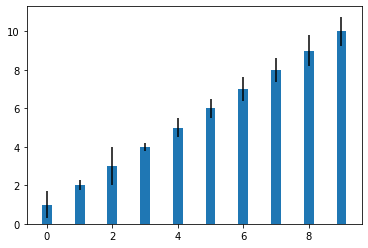

In [5]:
err = np.random.random(len(data1))

# plot errorbars using the list of random error values
plt.bar(xvals, data1, width = 0.3, yerr=err)

<BarContainer object of 10 artists>

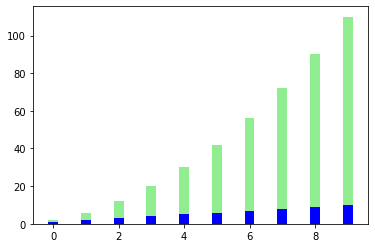

In [6]:
# stacked bar charts 
plt.figure()
xvals = range(len(data1))
plt.bar(xvals, data1, width = 0.3, color='b')
plt.bar(xvals, data2, width = 0.3, 
        bottom=data1, #stacked
        color='lightgreen')

<BarContainer object of 10 artists>

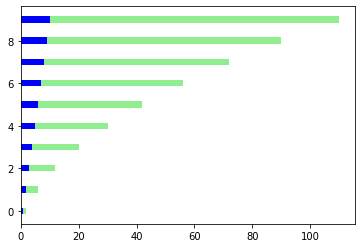

In [7]:
# barh: horizontal bar charts
plt.figure()
xvals = range(len(data1))
plt.barh(xvals, data1, height = 0.3, color='b')
plt.barh(xvals, data2, height = 0.3, 
         left=data1, #stacked
         color='lightgreen')

## Boxplots

In [8]:
import numpy as np
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

In [9]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,0.008567,0.502120,1.980329
std,1.000732,0.287106,1.417758
min,-3.462410,0.000092,0.007072
25%,-0.669284,0.256795,0.950967
50%,0.010057,0.501762,1.655721
75%,0.687243,0.751198,2.650397
max,3.913318,0.999987,11.064944


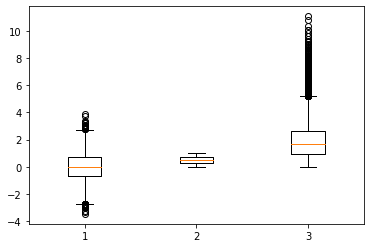

In [10]:
# plot boxplots for all three of df's columns
# assign the output to a variable to supress output
plt.boxplot([ df['normal'], df['random'], df['gamma'] ]);

## Plot with Pandas

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [12]:
# see the pre-defined styles provided.
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [13]:
# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

### DataFrame.plot

In [14]:
np.random.seed(1234)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('08/31/2020', periods=365))
df.head()

,A,B,C
2020-08-31,0.471435,21.385255,-20.625889
2020-09-01,-0.719541,20.230654,-21.876160
2020-09-02,0.713166,18.962585,-21.261024
2020-09-03,0.400515,19.570447,-21.382419
2020-09-04,-0.320074,18.490351,-22.663314


In [15]:
# add a semi-colon to suppress the output
df.plot(); 

<IPython.core.display.Javascript object>

We can select which plot we want to use by passing it into the 'kind' parameter. <br>
Alternatively, use `DataFrame.plot.kind` methods.

`kind` :
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as 'kde'
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

In [16]:
df.plot('A','C', kind = 'scatter');

<IPython.core.display.Javascript object>

In [17]:
# scatterplot of 'A' and 'C'
# color (c) and size (s) based on column 'B'
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis');

<IPython.core.display.Javascript object>

d:\source\sdsc2001\venv\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [18]:
df.plot.box();

<IPython.core.display.Javascript object>

In [19]:
df.plot.hist(bins=20,alpha=0.7);

<IPython.core.display.Javascript object>

In [20]:
# kernel density estimation plot instead 
df.plot.kde();

<IPython.core.display.Javascript object>

### pd.plotting

In [21]:
pd.plotting?

In [22]:
pd.plotting.scatter_matrix(df, alpha=0.2);

<IPython.core.display.Javascript object>

## Seaborn
High-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

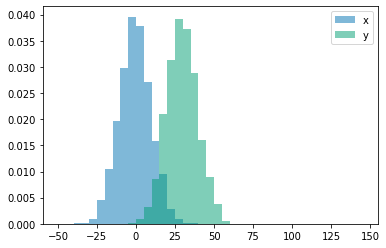

In [24]:
data = np.random.multivariate_normal([0, 30], 
                                     [[100, 50], [50, 100]],
                                     size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5,
            bins=np.arange(-50,150,5), label = col)
plt.legend();

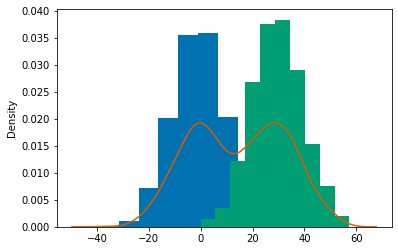

In [25]:
# kernel density estimation over stacked barchart
plt.figure()
for col in 'xy':
    plt.hist(data[col], histtype='barstacked', density=True);

v3 = np.concatenate((data['x'],data['y']))
sns.kdeplot(v3);

d:\source\sdsc2001\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\source\sdsc2001\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


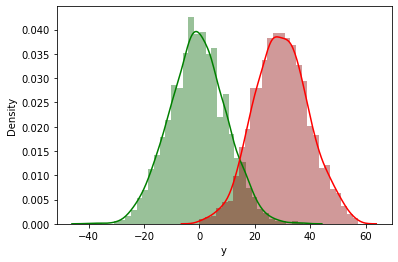

In [26]:
plt.figure()
#distplot combining histogram and density plot
sns.distplot(data['x'], hist_kws={'color': 'darkgreen'},
             kde_kws={'color': 'green'});
sns.distplot(data['y'], hist_kws={'color': 'darkred'},
             kde_kws={'color': 'red'});

d:\source\sdsc2001\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


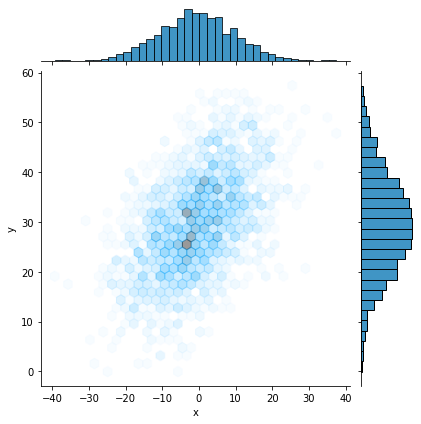

In [27]:
#joint distribution and the marginal distributions together
sns.jointplot("x","y", data, alpha=0.4, kind='hex');

#### pairwise plot

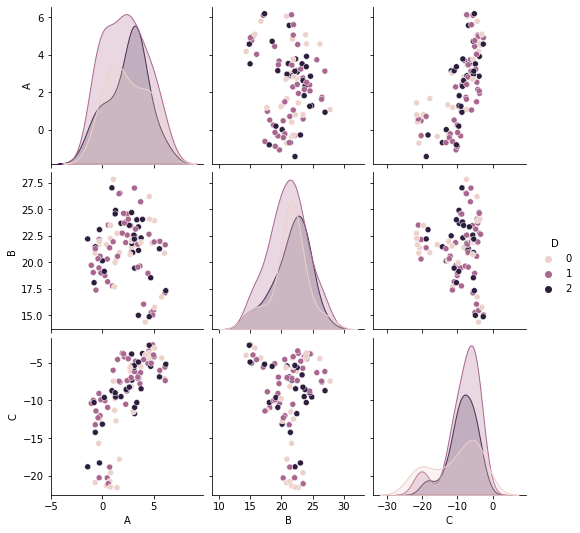

In [28]:
# pairwise plot
np.random.seed(1234)

df = pd.DataFrame({'A': np.random.randn(100).cumsum(0), 
                   'B': np.random.randn(100).cumsum(0) + 20,
                   'C': np.random.randn(100).cumsum(0) - 20, 
                   'D': np.random.randint(0,3,100)})

sns.pairplot(df, hue='D');

#### facet histograms

In [36]:
# the amount that restaurant staff receive in tips 
# based on various indicator data
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


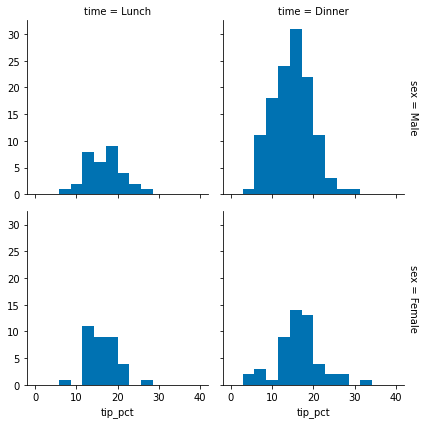

In [30]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
grid = sns.FacetGrid(tips, row="sex", col="time", 
                     margin_titles=True)
grid.map(plt.hist, "tip_pct", 
         bins=np.linspace(0, 40, 15));

#### factor plot

d:\source\sdsc2001\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


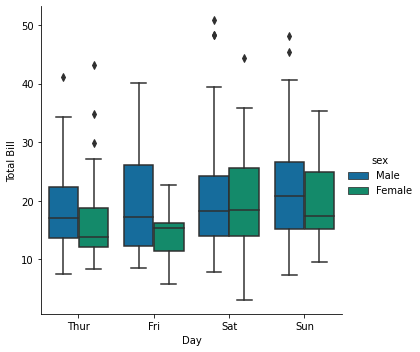

In [31]:
g = sns.catplot("day", "total_bill", 
                    "sex", #legend group
                    data=tips, kind="box")
g.set_axis_labels("Day", "Total Bill");

#### joint distributions

d:\source\sdsc2001\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


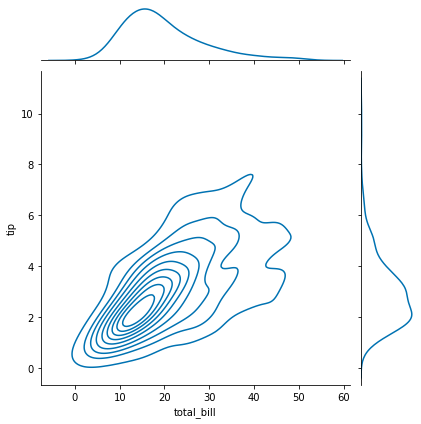

In [32]:
sns.jointplot("total_bill", "tip", data=tips, 
                  kind='kde');

d:\source\sdsc2001\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


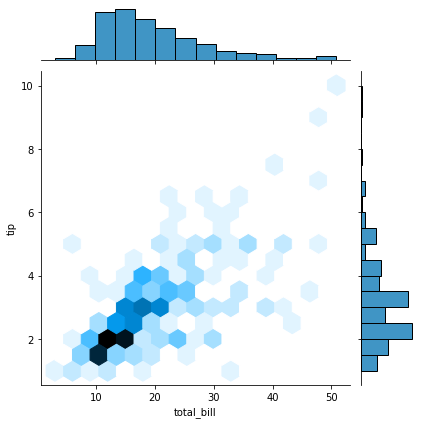

In [33]:
sns.jointplot("total_bill", "tip", data=tips, 
                  kind='hex'); #hexagon density plot (nonnegative)

d:\source\sdsc2001\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


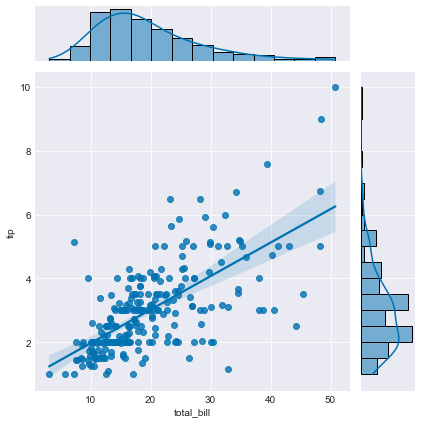

In [34]:
plt.style.use('seaborn-darkgrid')
#regression
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

#### violin plot

d:\source\sdsc2001\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


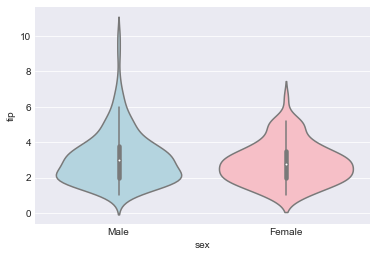

In [35]:
sns.violinplot("sex", "tip", data=tips,
               palette=["lightblue", "lightpink"]);